In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

In [21]:
# Add some columns for upvote metrics
odf = pd.read_csv('C://Users//appol//OneDrive//Documents//Data Mining//Reviews.csv')
new1 = odf
odf['Helpful %'] = np.where(odf['HelpfulnessDenominator'] > 0, odf['HelpfulnessNumerator'] / odf['HelpfulnessDenominator'], -1)
odf['% Upvote'] = pd.cut(odf['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
odf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,% Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


Text(0.5, 1.0, 'How helpful users find among user scores')

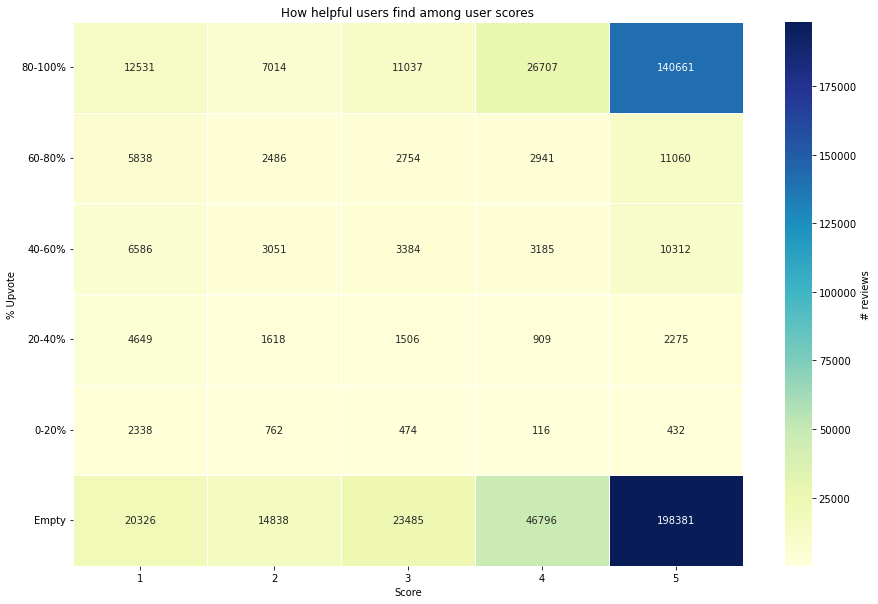

In [152]:
# How helpful users find user scores heatmap
df_s = odf.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

In [35]:
# Removing scores with 3 to segregate positive and negative ratings
df = odf[odf['Score'] != 3]
X = df['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['Score'].map(y_dict)

In [36]:
from sklearn import metrics
# Function to fit logistic regression to get the correlation coefficients for all the positive and negative words in the text
def text_fit(X, y, model,clf_model,good_list,coef_show=1):
    X_c = model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    predictions = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    print(cm)
    print(acc)
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        good_list = pd.DataFrame(coeff_df)
        return good_list

In [37]:
# Call the function to fit the logistic regression
tfidf = TfidfVectorizer(stop_words = 'english')
good_list = []
#text_fit(X, y, tfidf, LogisticRegression(),good_list)
a=text_fit(X, y, tfidf, LogisticRegression(),good_list)
print(a)

C:\Users\appol\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\appol\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[11544  5322]
 [ 1870 88092]]
0.9326768263002209
                 Word  Coefficient
46510           great    13.269117
18084            best    11.759946
32160       delicious    11.401954
71676         perfect    10.058426
59129           loves     9.304220
...               ...          ...
9960            awful    -7.982131
33918    disappointed    -8.358206
93642        terrible    -8.817351
33922   disappointing    -9.614512
103090          worst   -11.401930

[104736 rows x 2 columns]


In [156]:
# Split positive reviews and positive reviews
good_review =list(a['Word'].head(20))
bad_review =list(a['Word'].tail(20))
    

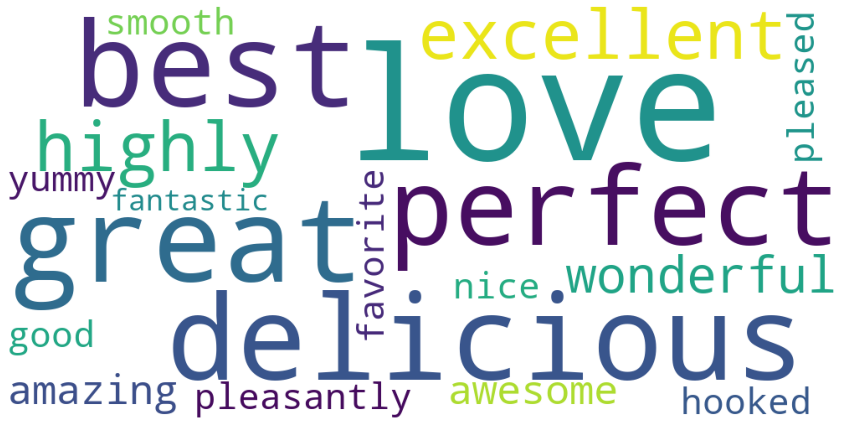

In [157]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# WordCloud of positive reviews
wordcloud = WordCloud(background_color='white',width = 1000, height = 500).generate(" ".join(good_review))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


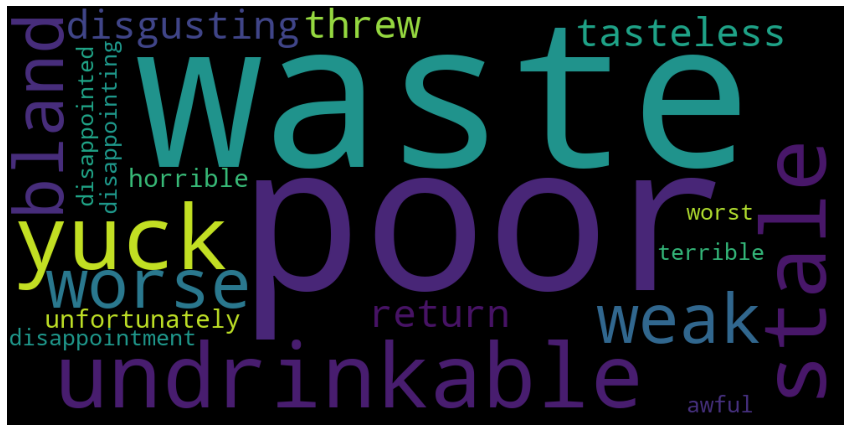

In [158]:
# WordCloud for negative reviews
wordcloud = WordCloud(background_color='black',width = 1000, height = 500).generate(" ".join(bad_review))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

Topic Modeling

In [23]:
#  Remove Unhelpful Reviews & Narrow It To First 15000 Due To Data Size
train_set = new1.loc[(new1['Score'] > 3) & (new1['Id'] < 10000)]

In [24]:
# Package to get rid of stop words
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\appol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\appol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
# Function to strip out nouns
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [26]:
# Call Function to strip out nouns
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))

In [27]:
data_nouns

,Text
0,Vitality food products quality product stew me...
2,confection centuries citrus gelatin nuts case ...
4,Great taffy price assortment yummy taffy Deliv...
5,hair taffy pound bag taffy flavors watermelon ...
6,saltwater taffy flavors candy None candies ver...
...,...
9993,formula US market Earth Best form time CHEAPER...
9994,Similac Advanced Organic daughter month months...
9996,reviews formula daughter problem believer orga...
9997,formula Similac company ton hospital powder be...


In [28]:
from sklearn.feature_extraction import text 

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index

C:\Users\appol\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
data_dtmn

,02,09,0xk6hzpjrkaed855hewp,10,100,103,12,140,1423603680,16,...,zojirushi,zola,zomg,zoo,zotz,zucchini,zuke,zukes,zuppa,ît
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import gensim
import gensim.corpora as corpora
from gensim import matutils, models
import scipy.sparse

# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())

In [32]:
# Create model and display topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.show_topics()

[(0,
  '0.019*"food" + 0.018*"product" + 0.016*"amazon" + 0.009*"price" + 0.008*"dog" + 0.008*"mix" + 0.007*"store" + 0.006*"treats" + 0.006*"cat" + 0.005*"foods"'),
 (1,
  '0.045*"coffee" + 0.024*"flavor" + 0.019*"taste" + 0.017*"cup" + 0.016*"tea" + 0.010*"product" + 0.010*"cups" + 0.010*"chocolate" + 0.008*"sugar" + 0.008*"water"')]

In [33]:
# Create model and display topics with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.show_topics()

[(0,
  '0.074*"coffee" + 0.028*"cup" + 0.021*"food" + 0.019*"flavor" + 0.017*"cups" + 0.013*"taste" + 0.011*"dog" + 0.009*"price" + 0.009*"roast" + 0.008*"chocolate"'),
 (1,
  '0.015*"flavor" + 0.014*"chips" + 0.009*"taste" + 0.009*"seeds" + 0.007*"snack" + 0.006*"oil" + 0.006*"bag" + 0.006*"flavors" + 0.006*"beans" + 0.006*"sauce"'),
 (2,
  '0.030*"product" + 0.025*"tea" + 0.015*"amazon" + 0.013*"taste" + 0.012*"flavor" + 0.011*"sugar" + 0.010*"price" + 0.010*"water" + 0.008*"juice" + 0.007*"mix"')]

In [34]:
# Create model and display topics with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.show_topics()

[(0,
  '0.034*"tea" + 0.025*"product" + 0.015*"amazon" + 0.013*"sugar" + 0.012*"flavor" + 0.012*"taste" + 0.012*"juice" + 0.010*"water" + 0.009*"price" + 0.009*"drink"'),
 (1,
  '0.029*"food" + 0.014*"chips" + 0.012*"dog" + 0.012*"flavor" + 0.010*"bag" + 0.008*"treats" + 0.008*"product" + 0.008*"cat" + 0.008*"taste" + 0.008*"seeds"'),
 (2,
  '0.020*"puck" + 0.019*"wolfgang" + 0.015*"cookies" + 0.010*"product" + 0.007*"gum" + 0.007*"cookie" + 0.006*"tofu" + 0.005*"chocolate" + 0.005*"flavor" + 0.005*"biscuits"'),
 (3,
  '0.078*"coffee" + 0.029*"cup" + 0.025*"flavor" + 0.020*"taste" + 0.018*"cups" + 0.015*"chocolate" + 0.012*"product" + 0.011*"price" + 0.010*"milk" + 0.010*"vanilla"')]